# Sea ice data

In [1]:
import xarray as xr
import s3fs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy
import cartopy.crs as ccrs
from dask.diagnostics import ProgressBar
from datetime import timedelta
import matplotlib.dates as mdate

%load_ext autoreload
%autoreload 2
import functions as f

s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))


## List data

In [3]:
s3.ls('escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/')[::-1]

['escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191231-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191230-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191229-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191228-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191227-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191226-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191225-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191224-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191223-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191222-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20191221-v5.4.nc',
 'escience

## Open single files

In [2]:
# path to the file: bucket/forlder/filename.nc
s3file = 's3://escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20150430-v5.4.nc'
file = s3.open(s3file)
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:              (x: 1216, y: 1792)
Coordinates:
  * x                    (x) float64 -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (y) float64 -5.347e+06 -5.341e+06 ... 5.847e+06
Data variables:
    polar_stereographic  |S1 ...
    z                    (y, x) float32 ...
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 19:14:47 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

## Plot

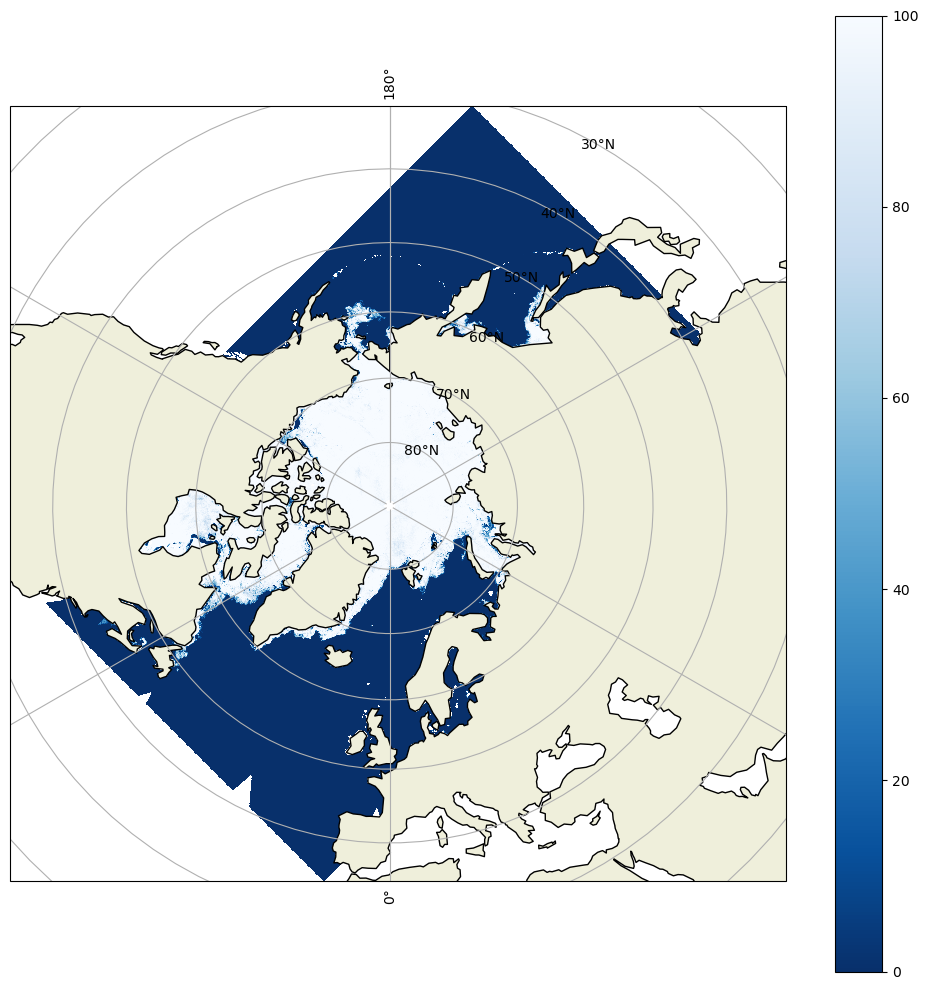

In [3]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
# fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

plt.pcolormesh(ds.x, ds.y, ds.z,
    transform=ccrs.epsg(3411),
    cmap=plt.colormaps['Blues_r']
        )
plt.colorbar()

# ax.set_extent( [-180,180, 60,90], ccrs.PlateCarree())

ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()

## Chukchi

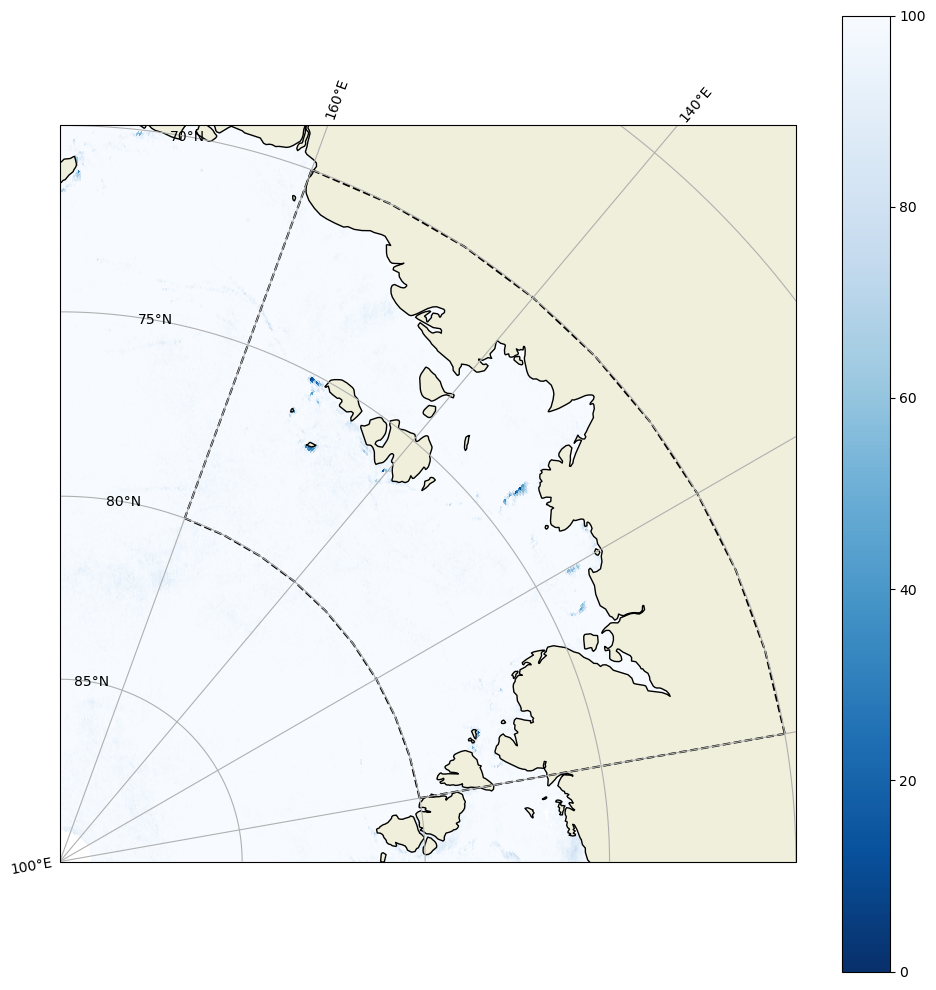

In [4]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
# fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

plt.pcolormesh(ds.x, ds.y, ds.z,
    transform=ccrs.epsg(3411),
    cmap=plt.colormaps['Blues_r']
        )
plt.colorbar()

chukchi = [100,160, 70,80]

f.rect(ax, chukchi )
ax.set_extent( [90,180, 70,90], ccrs.PlateCarree())

ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()


## Canadian archipelago

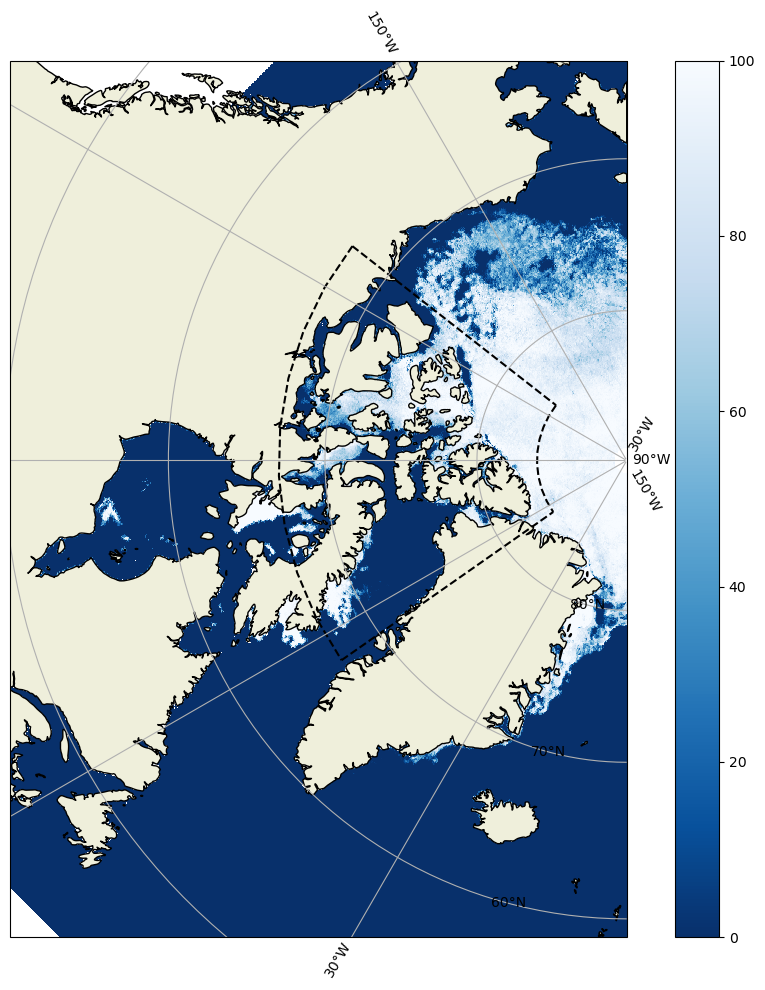

In [9]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
# fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

plt.pcolormesh(ds.x, ds.y, ds.z,
    transform=ccrs.epsg(3411),
    cmap=plt.colormaps['Blues_r']
        )
plt.colorbar()

caa = [-128,-55, 67,84]
f.rect(ax, caa )
ax.set_extent( [-130,-40, 50,90], ccrs.PlateCarree())

ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()

## Sea ice extent

In [23]:
siExt = xr.where(ds.z>15,1.,np.NaN)
siExt

<xarray.DataArray 'z' (y: 1792, x: 1216)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * x        (x) float64 -3.847e+06 -3.841e+06 ... 3.741e+06 3.747e+06
  * y        (y) float64 -5.347e+06 -5.341e+06 ... 5.841e+06 5.847e+06

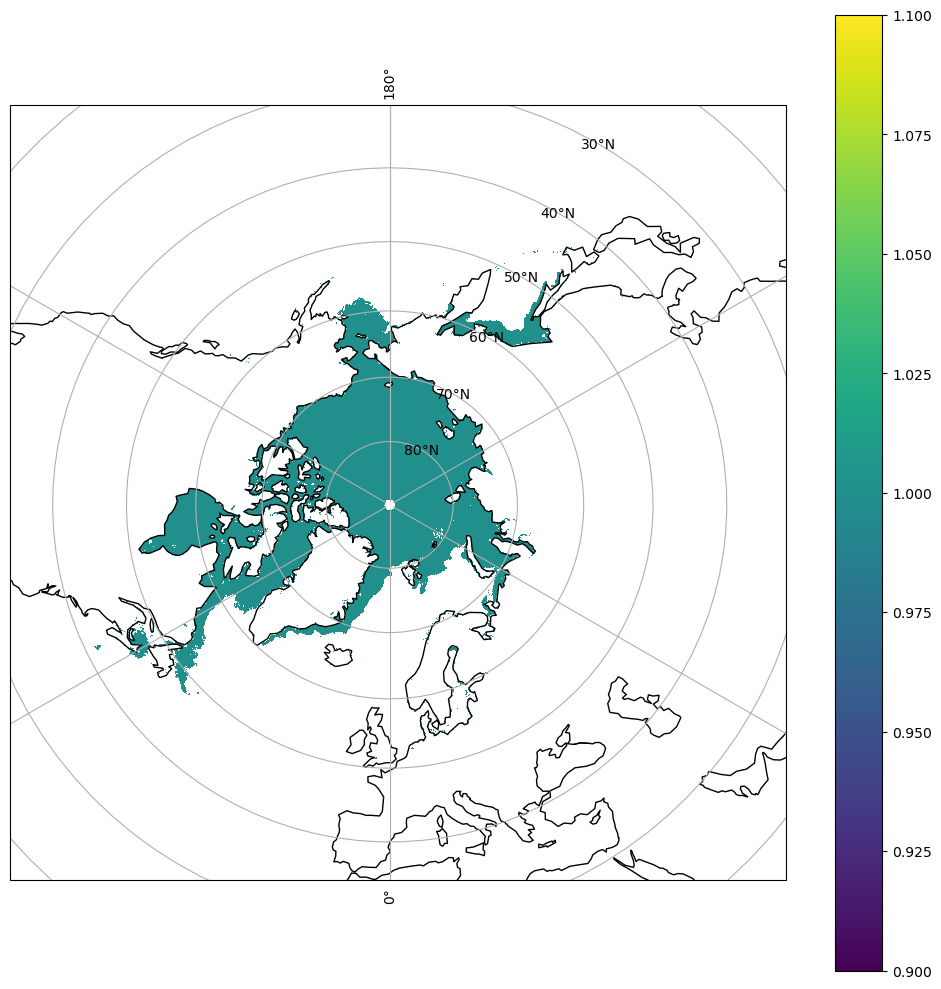

In [26]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
# fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

plt.pcolormesh(siExt.x, siExt.y, siExt,
    transform=ccrs.epsg(3411),
        )
plt.colorbar()
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.tight_layout()


<xarray.DataArray 'z' (y: 1792, x: 1216)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * x        (x) float64 -3.847e+06 -3.841e+06 ... 3.741e+06 3.747e+06
  * y        (y) float64 -5.347e+06 -5.341e+06 ... 5.841e+06 5.847e+06
Attributes:
    long_name:     z
    actual_range:  [  0 100]
    grid_mapping:  polar_stereographic

## Multiple files (local)

In [2]:
dsi = xr.open_mfdataset("data/SIC/AMSR*.nc", combine='by_coords')
dsi

<xarray.Dataset>
Dimensions:              (time: 2733, x: 1216, y: 1792)
Coordinates:
  * x                    (x) float64 -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (y) float64 -5.347e+06 -5.341e+06 ... 5.847e+06
  * time                 (time) datetime64[ns] 2012-07-02 ... 2019-12-31
Data variables:
    polar_stereographic  (time) |S1 dask.array<chunksize=(30,), meta=np.ndarray>
    z                    (time, y, x) float32 dask.array<chunksize=(30, 1792, 1216), meta=np.ndarray>
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 18:50:27 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

## Interactive plots

In [3]:
from ipywidgets import interact, interactive, fixed, widgets             # For interactive plotting
from datetime import datetime                                # For time computations

timeformat = '%Y-%m-%d'
minlon, maxlon, minlat, maxlat = -180,180, 60,90
# minlon, maxlon, minlat, maxlat = 100,160, 70,90


def plot_map(date):
    '''
        Helper function to be called from IPyWidgets.interact to compute timestep
    Args:
        date   [Datetime]  : Datetime.Datetime instance to plot the data at
    '''        
    fig, ax = plt.subplots(figsize=(9,9),subplot_kw={'projection':ccrs.NorthPolarStereo()})
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    ax.set_extent([minlon, maxlon, minlat, maxlat], crs=ccrs.PlateCarree())
    ax.set_title('Sea ice - ' + str(date.strftime(timeformat)) )
    ax.pcolormesh(dsi.x, dsi.y, 
                    dsi.sel(time=date).z,
                    transform=ccrs.epsg(3411),
                    cmap=plt.colormaps['Blues_r']
    )

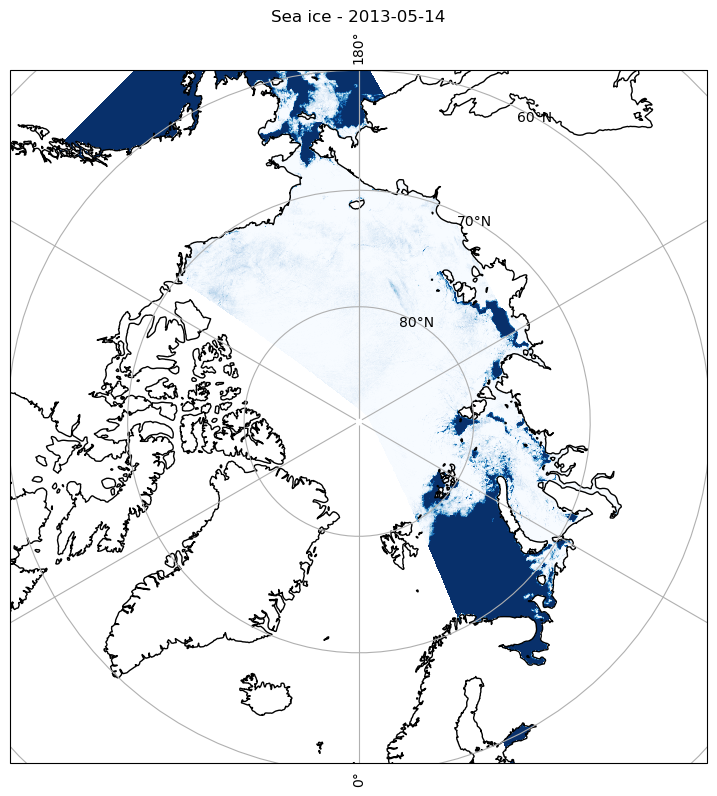

In [4]:
plot_map(datetime(2013,5,14) )

In [4]:
start=datetime(2012, 7,3)
stop=datetime(2019, 12, 31) 
dates = pd.date_range(start, stop, freq='W')

# index = (0, len(options) - 1)
    
date_slider = widgets.SelectionSlider(
    options=[(date.strftime(timeformat), date) for date in dates],
    orientation='horizontal',
    layout={'width': '800px'}
                )

interact(plot_map, date=date_slider)


interactive(children=(SelectionSlider(description='date', layout=Layout(width='800px'), options=(('2012-07-08'…

<function __main__.plot_map(date)>

## Add lat lon

In [3]:
import pyproj
# Change co-ordinates
# Output coordinates are in WGS 84 longitude and latitude
projOut = pyproj.Proj(init='epsg:4326')

# Input coordinates are in meters on the Polar Stereographic 
# projection given in the netCDF file
projIn = pyproj.Proj(init='epsg:3411',
    preserve_units=True)

xx, yy = np.meshgrid( dsi.x.values, dsi.y.values)
lon,lat= pyproj.transform(projIn, projOut, xx, yy )
dsi['lon'] = (('y','x'),lon)
dsi['lat'] = (('y','x'),lat)

/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_7618/4118693686.py:12: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon,lat= pyproj.t

## Selecting area

### with lat / long

In [4]:
# GREENLAND SEA
# dsi = dsi.where(
#     (dsi.lon>=-10) & (dsi.lon<=10) & 
#     (dsi.lat <=85 ) & (dsi.lat>= 70),
#     drop = True)
# Siberia sea
# dsi = dsi.where(
#     (dsi.lon>=100) & (dsi.lon<=160) & 
#     (dsi.lat>=70 ) & (dsi.lat<= 80),
#     drop = True)
# CAA
dsi = dsi.where(
    (dsi.lon>=-128) & (dsi.lon<=-55) & 
    (dsi.lat>=67 ) & (dsi.lat<= 84),
    drop = True)

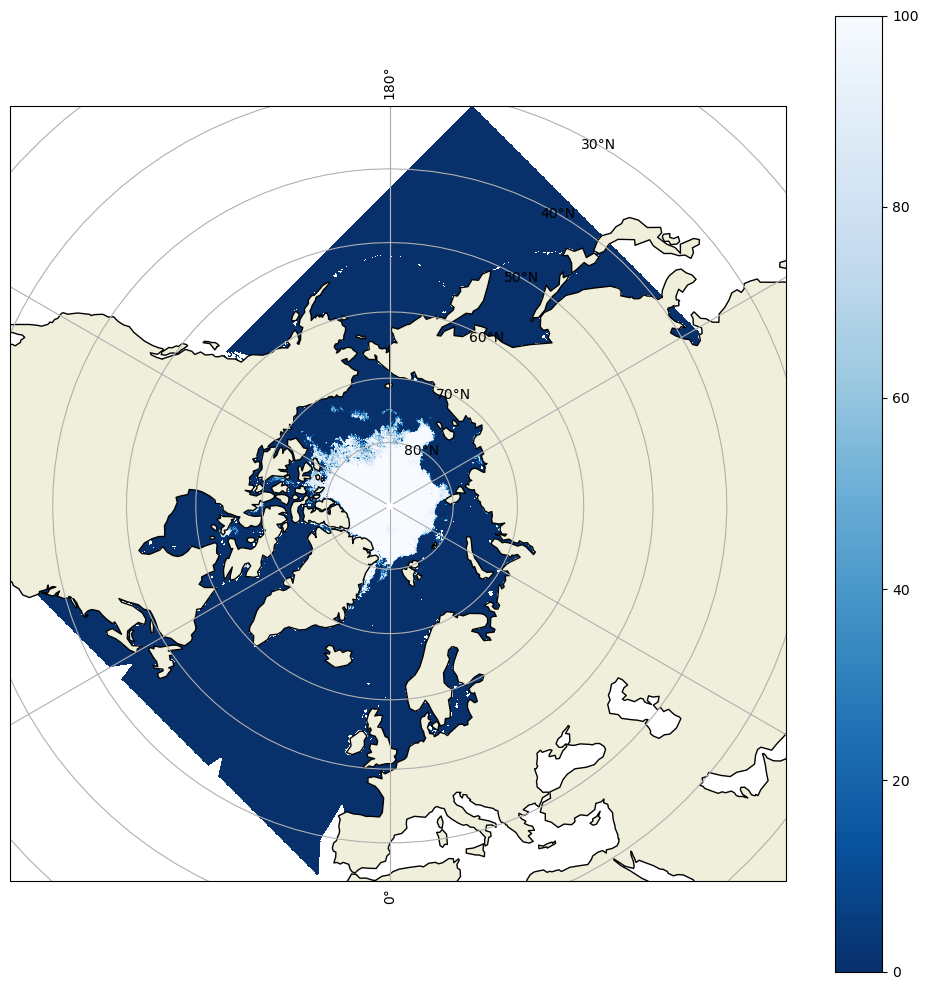

In [4]:

fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})

plt.pcolormesh(dsi.x, dsi.y, dsi.z.sel(time='2015-9-1'),
    transform=ccrs.epsg(3411),
    cmap=plt.colormaps['Blues_r']
        )
plt.colorbar()

# ax.set_extent( [-180,180, 60,90], ccrs.PlateCarree())

ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()

## Sea ice extent

In [5]:
area = 6.25**2
with ProgressBar():
    iceExt = ( (xr.where(dsi.z>15, 1.,0).sum(dim=['x','y']))*area ).compute()
iceExt=xr.where(iceExt>0,iceExt,np.NaN)

[########################################] | 100% Completed | 77.82 s


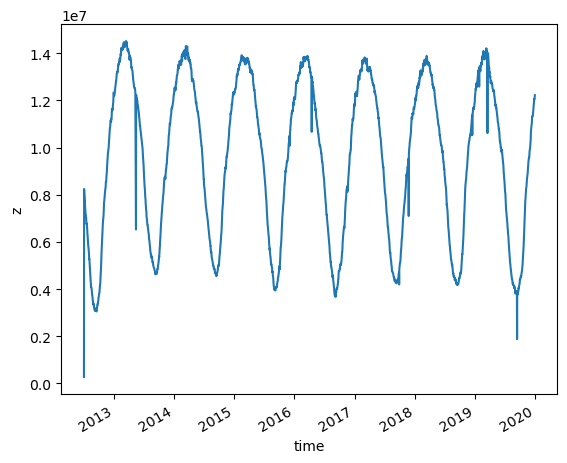

In [6]:
iceExt.plot()

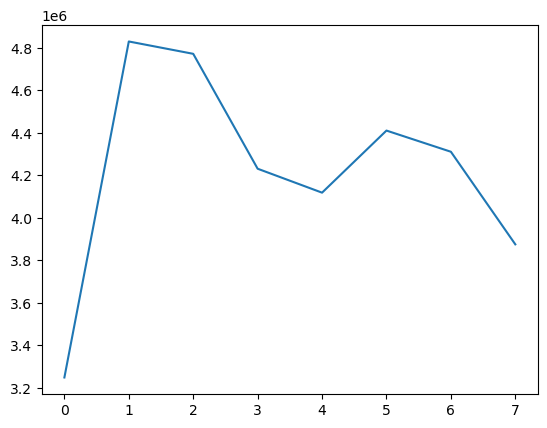

In [7]:
plt.plot(iceExt.groupby('time.month')[9].groupby('time.year').mean())

## Sea ice time distribution

In [8]:
ys = np.unique(dsi.time.dt.year)
doy= np.arange(0,365)
t2d = np.array([
    [np.datetime64(str(y)) + np.timedelta64(d, 'D') for d in doy ] 
        for y in ys])

In [9]:
ice2d = np.array([
        [ iceExt.sel(time=d) if d in iceExt.time else np.NaN for d in y ]
            for y in t2d ])

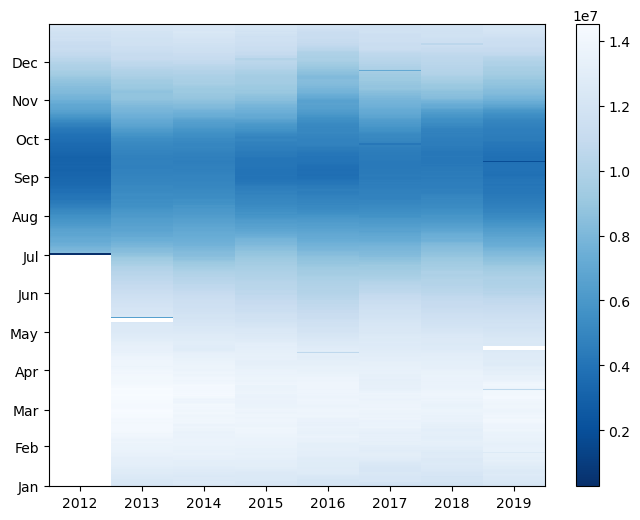

In [10]:
fig, ax = plt.subplots(figsize = (8,6))

pl=ax.pcolormesh(ys, 
            [np.datetime64('2000') + np.timedelta64(d, 'D') for d in doy], 
               ice2d.T,
                cmap=plt.colormaps['Blues_r']
)
fig.colorbar(pl)


fmt = mdate.DateFormatter('%b')
ax.yaxis.set_major_formatter(fmt)
ax.yaxis.set_major_locator(mdate.MonthLocator())
